In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:54<00:00, 23.5MB/s]
100% 1.06G/1.06G [00:54<00:00, 21.0MB/s]


In [3]:
import zipfile

zipdata = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zipdata.extractall('/content/')
zipdata.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels= 'inferred',
    label_mode='int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels= 'inferred',
    label_mode='int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
import tensorflow as tf

In [7]:
# Normalize

def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid', activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2 , padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2 , padding = 'valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2 , padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [11]:
history = model.fit(train_ds,epochs = 20,validation_data = validation_ds)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.5694 - loss: 2.5626 - val_accuracy: 0.6460 - val_loss: 0.6632
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6906 - loss: 0.5793 - val_accuracy: 0.7568 - val_loss: 0.5019
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.7719 - loss: 0.4814 - val_accuracy: 0.7604 - val_loss: 0.5009
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 85ms/step - accuracy: 0.8056 - loss: 0.4259 - val_accuracy: 0.6962 - val_loss: 0.7644
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.8389 - loss: 0.3649 - val_accuracy: 0.7752 - val_loss: 0.5857
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.8753 - loss: 0.2920 - val_accuracy: 0.8134 - val_loss: 0.4905
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9151 - loss: 0.2083 - val_accuracy: 0.7864 - val_loss: 0.7814
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 79ms/step - accuracy: 0.9425 - loss: 0.1471 - 

In [12]:
import matplotlib.pyplot as plt

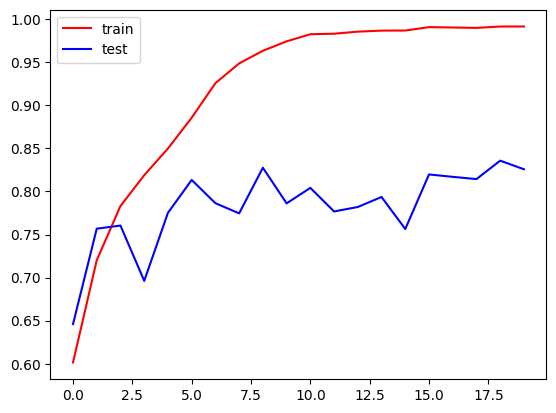

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

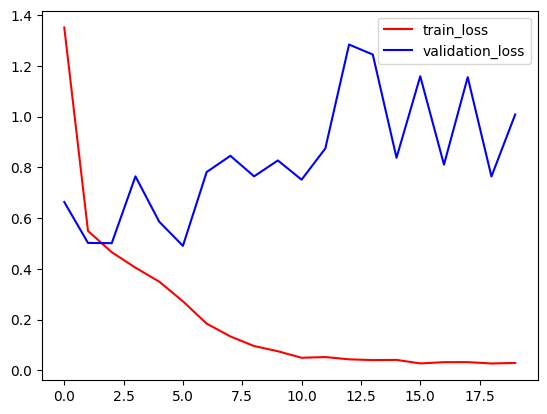

In [14]:
plt.plot(history.history['loss'],color='red',label='train_loss')
plt.plot(history.history['val_loss'],color='blue',label='validation_loss')
plt.legend()
plt.show()

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

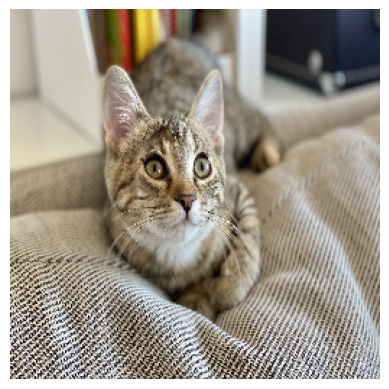

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
Prediction (probability): [[3.5528865e-05]]
The image is classified as a Cat (0).


In [17]:


# Load the image using OpenCV (BGR format)
cat_img = cv2.imread('/content/IMG_1882.jpg')

# Convert the BGR image to RGB format for correct visualization
cat_img_rgb = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)

# Resize the image to 256x256 pixels
cat_img_resized = cv2.resize(cat_img_rgb, (256, 256))

# Display the image
plt.imshow(cat_img_resized)
plt.axis('off')  # Hide axis for better visualization
plt.show()

# Normalize the image by dividing by 255
cat_img_normalized = cat_img_resized / 255.0

# Reshape the image to add batch dimension
cat_input = np.expand_dims(cat_img_normalized, axis=0)  # Shape: (1, 256, 256, 3)

# Predict with the model
prediction = model.predict(cat_input)

# Print the prediction
print(f"Prediction (probability): {prediction}")

# Map the prediction to class labels (0 for cat, 1 for dog)
predicted_label = (prediction > 0.5).astype(int)  # 0.5 is the threshold for binary classification

# Since '1' is for dog and '0' is for cat, we print the corresponding label
if predicted_label == 0:
    print("The image is classified as a Cat (0).")
else:
    print("The image is classified as a Dog (1).")


In [18]:
model.save('cat_dog_classifier.h5')



In [19]:
model.save('cat_dog_classifier.keras')